In [1]:
using GraphMakie
using CSV
using DataFrames
using DelimitedFiles
using ColorSchemes
using Plots
using PlotThemes
using SankeyPlots
using Tables
using StatsPlots
using LinearAlgebra

theme(:ggplot2)
palette(:set2)

LoadError: Unknown ColorScheme `:set2`. Check https://juliagraphics.github.io/ColorSchemes.jl/stable/ for available ColorSchemes.

In [2]:
unwrapped_complex_names = vec(readdlm("data/complex_names.txt", '\t', String, '\n'))
unwrapped_monomer_names = vec(readdlm("data/protein_names.txt", '\t', String, '\n'))
unwrapped_cofactor_names = vec(readdlm("data/cofactor_names.txt", '\t', String, '\n'))
unwrapped_element_names = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
unwrapped_pathway_names = vec(readdlm("data/pathway_names.txt", '\t', String, '\n'))

complex_ids = vec(readdlm("data/complex_ids.txt", '\t', String, '\n'))
monomer_ids = vec(readdlm("data/protein_ids.txt", '\t', String, '\n'))
cofactor_ids = vec(readdlm("data/cofactor_ids.txt", '\t', String, '\n'))
element_ids = vec(readdlm("data/element_ids.txt", '\t', String, '\n'))
pathway_ids = vec(readdlm("data/pathway_ids.txt", '\t', String, '\n'))
aa_ids = vec(readdlm("data/amino_acid_ids.txt", '\t', String, '\n'))




unwrapped_protein_names = [unwrapped_complex_names; unwrapped_monomer_names]
protein_ids = [complex_ids; monomer_ids]

C = Matrix(DataFrame(CSV.File("data/C_matrix.csv", header=false)))
P = Matrix(DataFrame(CSV.File("data/P_matrix.csv", header=false)))
E = Matrix(DataFrame(CSV.File("data/E_matrix.csv", header=false)))
W = Matrix(DataFrame(CSV.File("data/W_matrix.csv", header=false)))
W2 = Matrix(DataFrame(CSV.File("data/W2_matrix.csv", header=false)))
W1 = Matrix(DataFrame(CSV.File("data/W1_matrix.csv", header=false)))

A = Matrix(DataFrame(CSV.File("data/A_matrix.csv", header=false)))

Tree = Matrix(DataFrame(CSV.File("data/tree_matrix.csv")))

total_counts = Matrix(DataFrame(CSV.File("data/counts.csv", header=false)))

monomer_masses = vec(Matrix(DataFrame(CSV.File("data/monomer_masses.csv", header=false))))


tim_export = total_counts * C * P * E
CSV.write("data/element_sim.csv",  Tables.table(tim_export), writeheader=true, header=unwrapped_element_names)

dismutase_idx = findfirst(isequal("SUPEROX-DISMUTFE-CPLX"), protein_ids)
total_counts[:, dismutase_idx] .= 15000

nadh_dehyd_idx = findfirst(isequal("NADH-DHI-CPLX"), protein_ids) 
total_counts[:, nadh_dehyd_idx, :] .= 500

# succ_quinone_idx = findfirst(isequal("CPLX0-8160"), protein_ids) 
# total_counts[:, succ_quinone_idx, :] .= 1000

dps_idx = findfirst(isequal("EG11415-MONOMER"), monomer_ids) 
P[dps_idx, :] .= 0

counts = vec(total_counts[1, :])

# correction


5527-element Vector{Int64}:
   38
   89
 1744
 2729
  278
  544
  545
   66
 2199
  108
   65
  118
   43
    ⋮
    3
    0
    0
   58
  122
   22
    0
   12
    2
  526
    1
   18

In [3]:
function wrap_text(text::String, char_limit::Int)
    # Split the text into words
    words = split(text)
    wrapped_text = ""
    line_length = 0

    for word in words
        if line_length + length(word) > char_limit
            wrapped_text *= "\n"
            line_length = 0
        elseif wrapped_text != ""
            wrapped_text *= " "
        end
        wrapped_text *= word
        line_length += length(word) + 1  # +1 for the space
    end

    return wrapped_text
end

# Example usage:
char_limit = 30  # Insert a newline after 10 characters

# Wrap each category label
complex_names = [wrap_text(item, char_limit) for item in unwrapped_complex_names]
monomer_names = [wrap_text(item, char_limit) for item in unwrapped_monomer_names]
cofactor_names = [wrap_text(item, char_limit) for item in unwrapped_cofactor_names]
element_names = [wrap_text(item, char_limit) for item in unwrapped_element_names]
pathway_names = [wrap_text(item, char_limit) for item in unwrapped_pathway_names]
protein_names = [wrap_text(item, char_limit) for item in unwrapped_protein_names]

5527-element Vector{String}:
 "1-phosphofructokinase"
 "2-oxoglutarate dehydrogenase\ncomplex"
 "3-isopropylmalate\ndehydrogenase"
 "3-isopropylmalate dehydratase"
 "3-methyl-2-oxobutanoate\nhydroxymethyltransferase"
 "3-oxoacyl-[acyl carrier\nprotein] synthase 2"
 "6-phosphofructokinase 1"
 "6-phosphofructokinase 2"
 "6-phosphogluconate\ndehydrogenase, decarboxylating"
 "7-&alpha;-hydroxysteroid\ndehydrogenase"
 "8-amino-7-oxononanoate\nsynthase"
 "ferric enterobactin ABC\ntransporter"
 "iron(III) hydroxamate ABC\ntransporter"
 ⋮
 "putative ABC transporter\nmembrane subunit YphD"
 "putative ABC transporter\nATP-binding protein YphE"
 "DnaA initiator-associating\nprotein DiaA"
 "intermembrane phospholipid\ntransport system, integral\nmembrane subunit MlaE"
 "intermembrane phospholipid\ntransport system, ATP binding\nsubunit MlaF"
 "putative transport protein\nYrbG"
 "galactofuranose ABC\ntransporter periplasmic\nbinding protein"
 "galactofuranose ABC\ntransporter putative ATP\nbinding 

In [4]:
findfirst(isequal("NADH-DHI-CPLX"), protein_ids)

955

In [5]:
cur_idx = findfirst(isequal("PYRUVATEDEH-CPLX"), protein_ids)
counts[cur_idx]

122

In [6]:
cur_idx = findfirst(isequal("EG10889-MONOMER"), protein_ids)
counts[cur_idx]

7290

In [7]:
cur_idx = findfirst(isequal("CPLX0-3962"), protein_ids)
counts[cur_idx]

14912

# Create Sankey diagram of where the iron flows in the cell.

In [8]:
cur_elements = ["FE"]
cap_entries = 20

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
# C_E_counts = C_P_counts * P * E
C_O_counts = C_P_counts * P
C_E_counts = C_P_counts * P * E
cofactor_counts = vec(sum(C_O_counts, dims=1))
O_E_counts =  E .* repeat(cofactor_counts, 1, length(element_names))


# we have to normalize the array because C is not norm-preserving. 
C_norm = Array{Float64}(copy(C))

for i in 1:size(C)[2]
    C_norm[i, :] = C[i, :] / (sum(C[i, :]) + 0.00001)
end

C_P_norm_counts = C .* repeat(counts, 1, length(monomer_names))
C_W_norm_counts_cats = C_P_norm_counts * W * W2

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

# create cofactor indices of interest
cofactor_idxs = vec(E[:, element_idxs] .> 0)
cofactor_idxs_nz = findall(vec(cofactor_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_O = C_O_counts[capped_complex_idx, cofactor_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]
capped_O_E = O_E_counts[cofactor_idxs, element_idxs]


# corrective factor multiplies a cplx by its cofactor stoichiometry, needed for classes
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)
cofactor_element_corrective_factor = vec(E[cofactor_idxs, element_idxs])
cplx_element_norm = vec(capped_C_O * vec(E[cofactor_idxs, element_idxs]))
cplx_class_norm = vec(sum(capped_C_W, dims=2))

# create "remaining cofactors"
total_cofactor_counts = vec(sum(C_O_counts[:, cofactor_idxs], dims=1))
in_use_cofactor_counts = vec(sum(capped_C_O, dims=1))
remaining_cofactor_counts = vec(total_cofactor_counts - in_use_cofactor_counts)

# create "no class cplx", just use C_O counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(capped_C_O * cofactor_element_corrective_factor)

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_cofactors = length(cofactor_idxs_nz)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

element_name = element_names[element_idxs][1]
n_atoms = sum(capped_O_E)

# create labels
node_labels = ["$element_name $n_atoms atoms"; 
                cofactor_names[cofactor_idxs];
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["$c, \n other proteins" for c ∈ cofactor_names[cofactor_idxs]];
                "Uncategorized"
]

# create colors
colors = zeros(Int64, length(node_labels))

cofactor_colors = collect(1:(n_cofactors))
other_color = 0

colors[1] = 1
colors[2:(n_cofactors+1)] = cofactor_colors

# create sorting
## sorts elements
ordering_cofactors = Vector{Pair{Int64, Int64}}()
# sort_cofactors = sortperm(vec(sum(capped_C_O, dims=1)) .* cofactor_element_corrective_factor, rev=true)
# for i in 1:(n_cofactors-1)
#     push!(ordering_cofactors, (n_elements + sort_cofactors[i])=> (n_elements + sort_cofactors[i+1]))
# end


# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> O -> C -> W
# E -> O 
for i in 1:n_elements
    for j in 1:n_cofactors
        if capped_O_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_O_E[j, i])
            
            # colors[n_elements + j] = colors[i]
            
        end  
    end
end

# E -> O, reverse order because im a dumbass
for i in 1:n_cofactors
    for j in 1:n_cplx
        if capped_C_O[j, i] != 0
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cofactors + j)
            push!(weights, trunc(Int, capped_C_O[j, i] * cofactor_element_corrective_factor[i]))
            
            colors[n_elements + n_cofactors + j] = colors[n_elements + i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + n_cofactors + i)
            push!(dst, n_elements + n_cofactors  + n_cplx + j)
            push!(weights, trunc(Int64, trunc(Int, capped_C_W[i, j] * cplx_element_norm[i]/cplx_class_norm[i])))  # just corrects to sum of previous
            
            colors[n_elements + n_cofactors + n_cplx + j] = colors[n_elements + n_cofactors + i]
            
        end  
    end
    
#     if unclassified_cplx_idxs[i]
#         push!(src, n_elements + n_cofactors + i)
#         push!(dst, n_elements + n_cofactors + n_cplx + n_classes + n_elements + 1)
#         push!(weights, unclassified_cplx_counts[i])
        
#         colors[n_elements + n_cofactors + n_cplx + n_classes + n_elements + 1] = colors[n_elements + n_cofactors + i]
#     end
    
end

# O -> C remaining cnts
for i in 1:n_cofactors
    push!(src, n_elements + i)
    push!(dst, n_elements + n_cofactors + n_cplx + n_classes + i)
    push!(weights, trunc(Int, remaining_cofactor_counts[i] * cofactor_element_corrective_factor[i]))
    colors[n_elements + n_cofactors + n_cplx + n_classes + i] = colors[n_elements+i]
end 

# # C -> W remaining cplxes in 
for i in 1:n_cplx
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + n_cofactors + i)
        push!(dst, n_elements + n_cofactors + n_cplx + n_classes + n_cofactors + 1)
        push!(weights, trunc(Int, unclassified_cplx_counts[i]))
        colors[n_elements + n_cofactors + n_cplx + n_classes + n_cofactors + 1] = colors[i]
    end
end 




In [9]:


sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+3, categorical = true, rev=true)[2:(maximum(colors)+2)][colors],
        edge_color = :src,
        size=(1800, 1050),
        label_position = :right,
        label_size = 10,
        force_order = ordering_cofactors,
        title="Iron cofactor distribution in a single cell"
)


savefig("figures/iron.svg")




"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/iron.svg"

# with fine grained pathways

# Redoing the plotting prep 

In [10]:
cur_elements = ["ZN"]
cap_entries = 10

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [element_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ element_names[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



In [11]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_cofactors,
        title="How does the cell distribute its zinc across proteins where zinc is part of a cofactor?"
)

savefig("figures/zinc.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/zinc.svg"

# Manganese

In [12]:
cur_elements = ["MN"]
cap_entries = 10

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [element_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ element_names[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * capped_C_E[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



In [13]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_cofactors,
        title="How does the cell distribute its manganese across proteins where manganese is part of a cofactor?"
)

savefig("figures/manganese.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/manganese.svg"

In [14]:
cur_elements = ["NI", "CU", "MO", "SE", "CO"]
cap_entries = 25

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P * E)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [element_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ element_names[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * vec(sum(capped_C_E, dims=2))[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



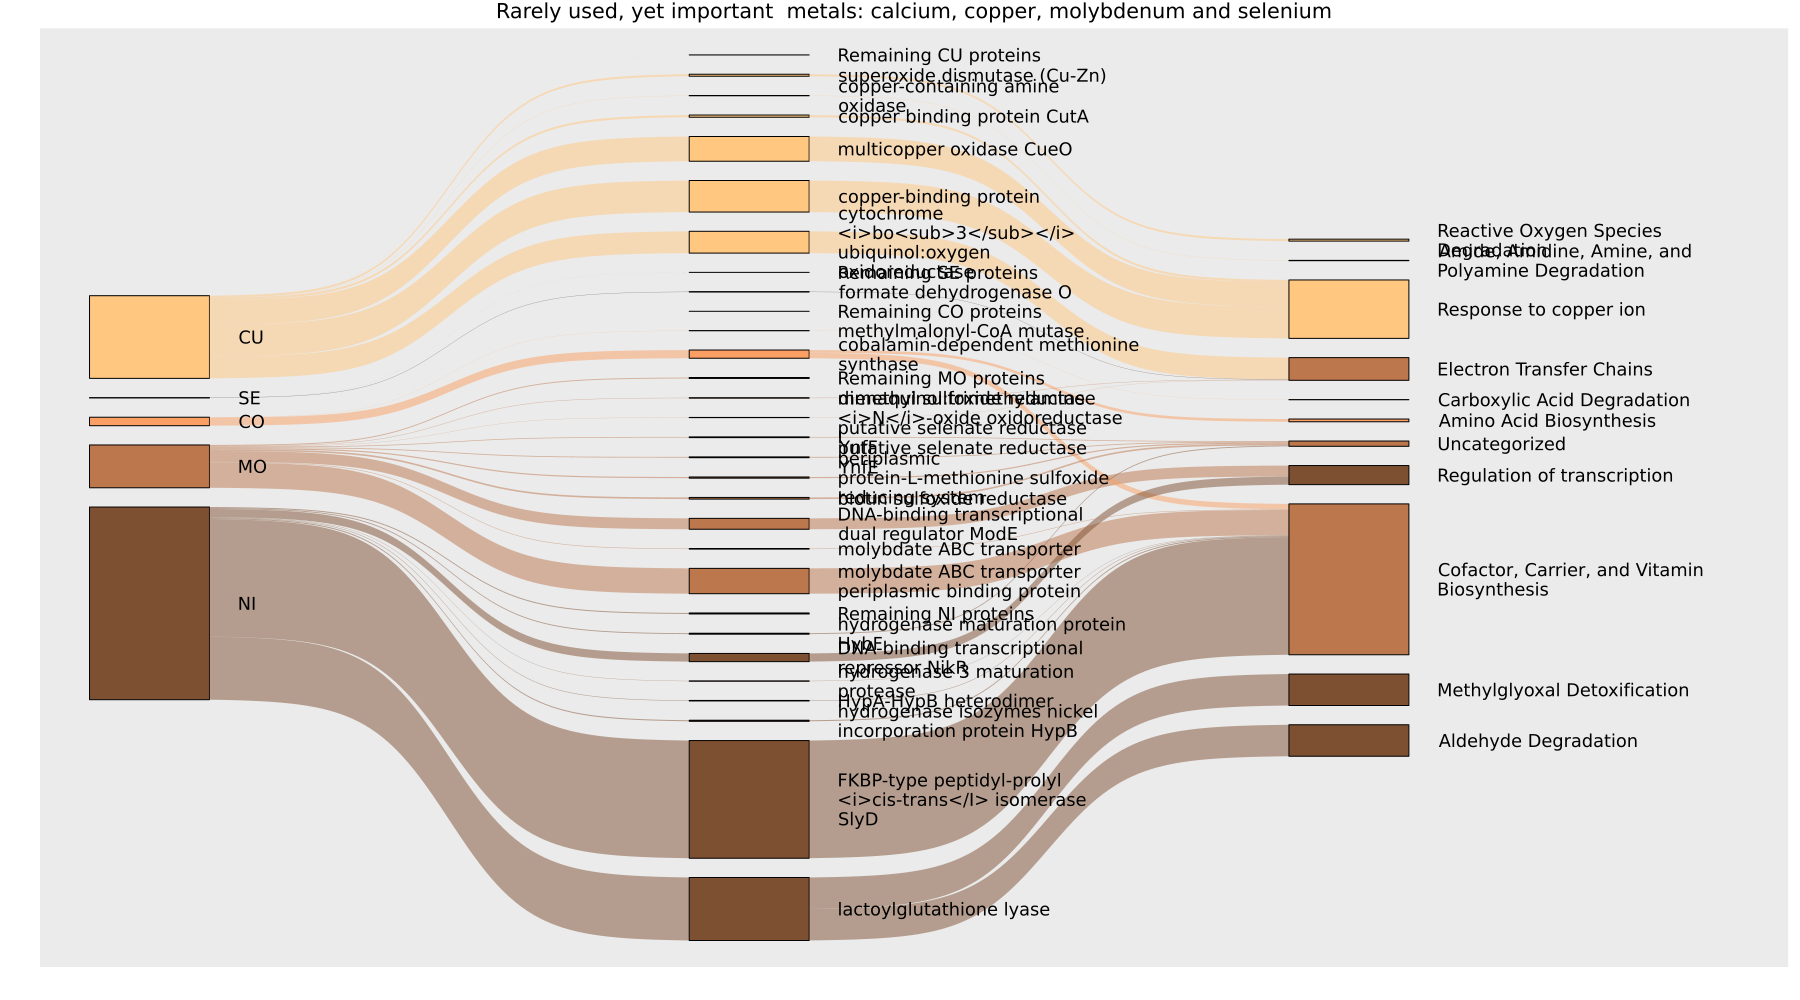

In [15]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_cofactors,
        title="Rarely used, yet important  metals: calcium, copper, molybdenum and selenium"
)

# savefig("figures/other_metals.svg")

# organic cofactors

In [16]:
cur_elements = ["FAD", "FMN", "thiamine diphosphate", "pyridoxal 5'-phosphate", "biotin", "(<i>R</i>)-lipoate"]
cap_entries = 20

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * P #  * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in cofactor_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * P)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [cofactor_names[element_idxs]; 
                protein_names[capped_complex_idx]; 
                pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ cofactor_names[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * vec(sum(capped_C_E, dims=2))[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



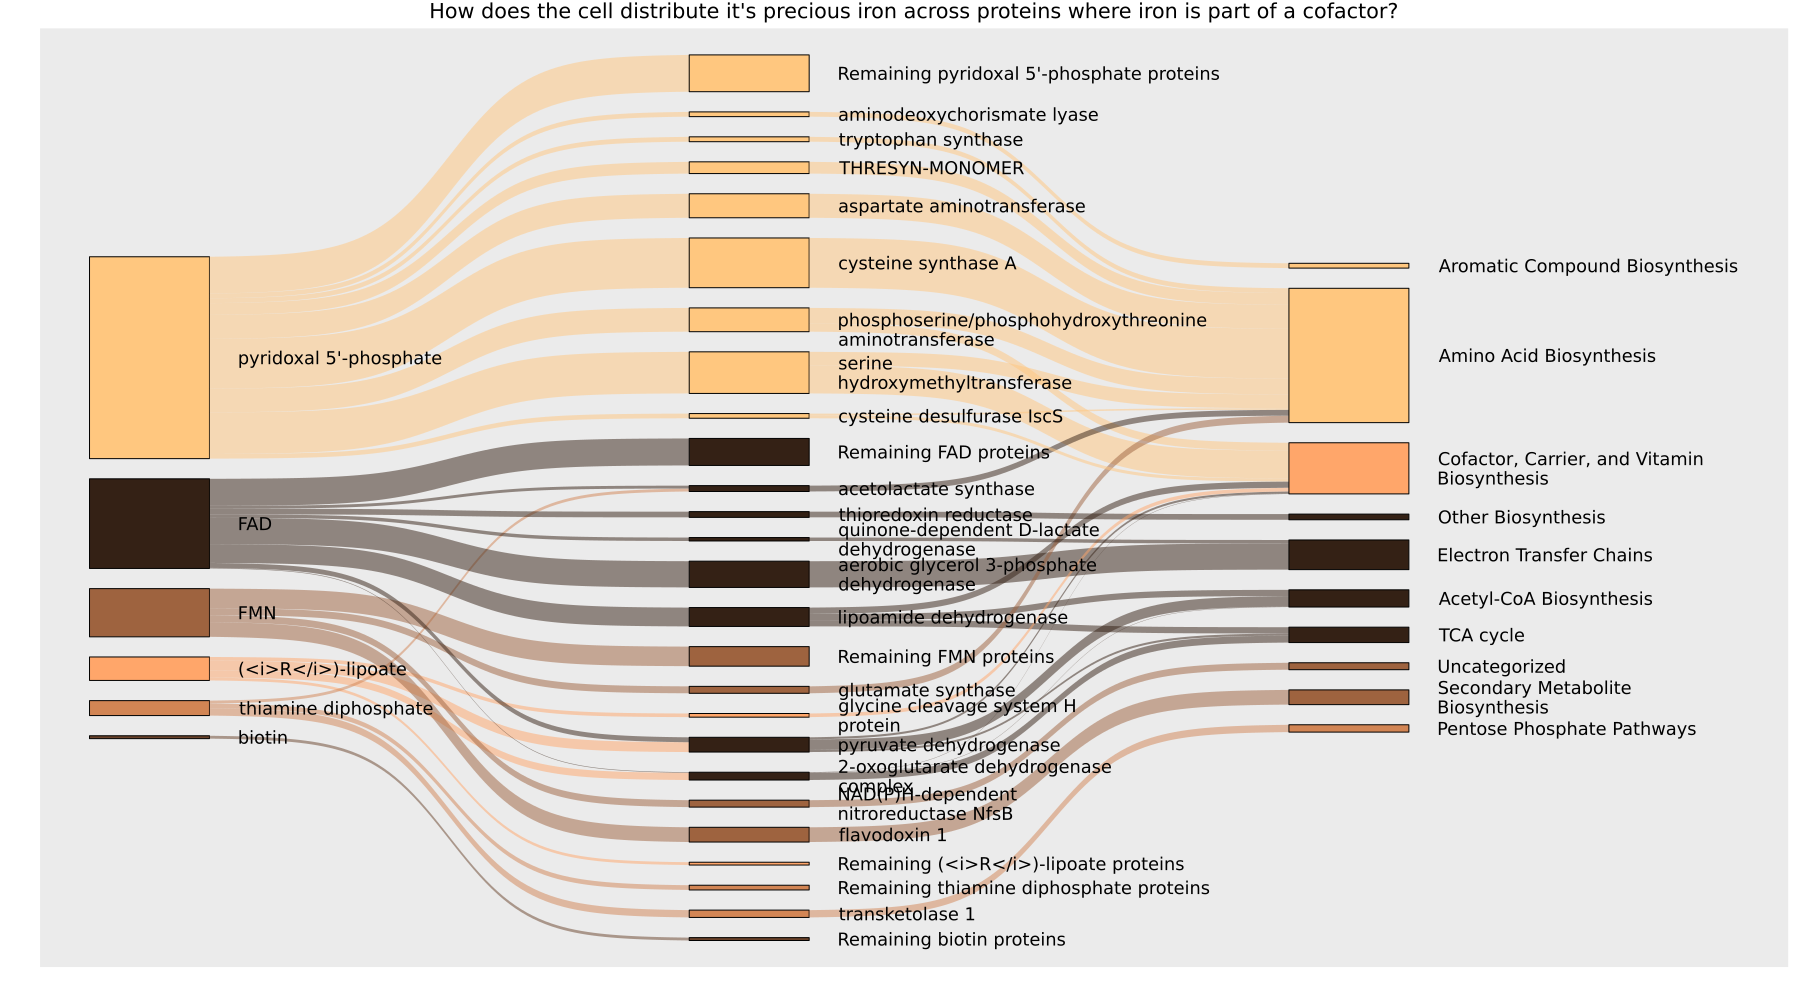

In [17]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_elements,
        title="How does the cell distribute it's precious iron across proteins where iron is part of a cofactor?"
)

# savefig("figures/organic.svg")

# Specialist vs generalist metal ions

In [18]:
cur_elements = ["MN"]
cap_entries = 3

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * P * E

# creating element indices of interest
element_idxs = [element in cur_elements for element in element_names]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]

total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))

1-element Vector{Int64}:
 48150

In [19]:
capped_C_E ./ total_element_counts

3×1 Matrix{Float64}:
 0.3870820353063344
 0.3794392523364486
 0.04818276220145379

In [20]:
top_utilizers_per_metal = Vector{Vector{Float64}}()

elements = ["FE", "ZN", "MN", "MO","CU", "SE", "NI", "CO"]

for element in elements
    cur_elements = [element]
    cap_entries = 3
    
    # create counts matrices
    C_P_counts = C .* repeat(counts, 1, length(monomer_names))
    C_E_counts = C_P_counts * P * E
    
    # creating element indices of interest
    element_idxs = [element in cur_elements for element in element_names]
    element_idxs_nz = findall(vec(element_idxs))
    
    ## cplx sorted by counts of elements
    capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
    capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))
    
    capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
    capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]
    
    total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))


    push!(top_utilizers_per_metal, vec(capped_C_E ./ total_element_counts))
    
end


# to matrix
top_utilizers_per_metal = mapreduce(permutedims, vcat, top_utilizers_per_metal)


8×3 Matrix{Float64}:
 0.118915  0.0915804  0.0634213
 0.123477  0.09813    0.0830909
 0.387082  0.379439   0.0481828
 0.592525  0.255242   0.0382862
 0.382089  0.299622   0.263705
 0.947368  0.0526316  0.0
 0.610801  0.327085   0.0425575
 0.974537  0.0231481  0.00231481

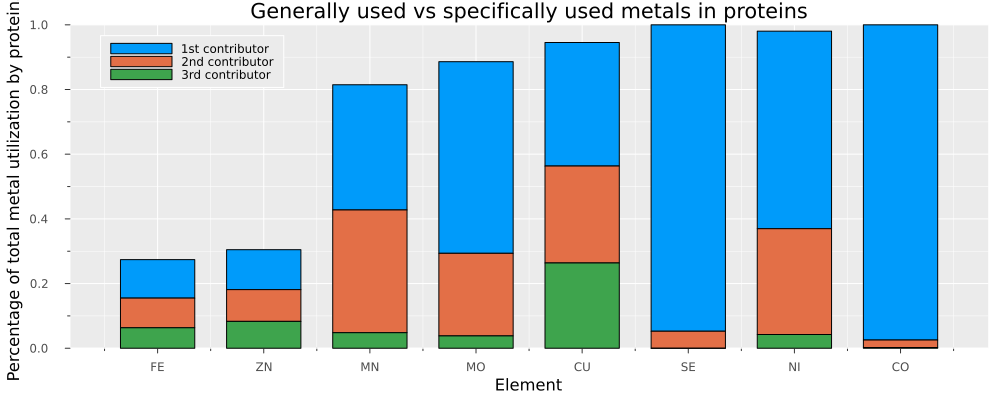

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/general_specific.svg"

In [21]:

# Plot
p = groupedbar(elements, Matrix(top_utilizers_per_metal), 
    bar_position = :stack, 
    bar_width=0.7,
    xlabel="Element",
    ylabel="Percentage of total metal utilization by proteins",
    title="Generally used vs specifically used metals in proteins",
    ylims=(0,1),
    label=["1st contributor" "2nd contributor" "3rd contributor"],
    size=[1000,400],
    left_margin=5Plots.mm,
    bottom_margin=5Plots.mm
    # color=[:red :orange :blue]
)
display(p)

savefig("figures/general_specific.svg")

# How many ions of interest seem to be bound in the cell?

In [22]:


element_timeseries = total_counts * C * P * E
["FE", "ZN", "MN", "MO","CU", "SE", "NI", "CO"]
cur_elements = ["FE", "ZN", "MN", "NI", "CU", "SE", "CO", "MO"]
validation_series = [180000, 200000, 5000, 0, 5000, 1000, 500, 2000] # FE, ZN, MN, CA, NI, CU, SE

element_idx = [element in cur_elements for element in element_names]

sorted_idxs = sortperm(element_timeseries[1,element_idx], rev=true)

current_series = element_timeseries[1,element_idx][sorted_idxs]

current_matrix = [current_series validation_series]

# element_counts = vec(sum(C_counts_elements[:, element_idx], dims=1))

plot(scatter(element_names[element_idx][sorted_idxs], current_matrix, markersize=10, labels=["sim" "validation (atoms/CFU)"]), legend = true, size=[800,600],
    title="How many functional metal ions are sequestered in proteins", xlabel="Element", ylabel="Atom counts per cell")

savefig("figures/prelim_validation_counts.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/prelim_validation_counts.svg"

In [23]:
cofactor_names

25-element Vector{String}:
 "pyridoxal 5'-phosphate"
 "(<i>R</i>)-lipoate"
 "a [3Fe-4S] iron-sulfur cluster"
 "Zn<SUP>2+</SUP>"
 "thiamine diphosphate"
 "FMN"
 "Any+2"
 "Na<SUP>+</SUP>"
 "Mg<SUP>2+</SUP>"
 "Fe<sup>2+</sup>"
 "Mn<SUP>2+</SUP>"
 "heme <i>b</i>"
 "MoO<sub>2</sub>-molybdopterin\ncofactor"
 "biotin"
 "Ca<SUP>2+</SUP>"
 "cob(I)alamin"
 "a [4Fe-4S] iron-sulfur cluster"
 "a [2Fe-2S] iron-sulfur cluster"
 "molybdate"
 "L-selenocysteine"
 "Ni<sup>2+</sup>"
 "K<SUP>+</SUP>"
 "Co<SUP>2+</SUP>"
 "Cu<SUP>2+</SUP>"
 "FAD"

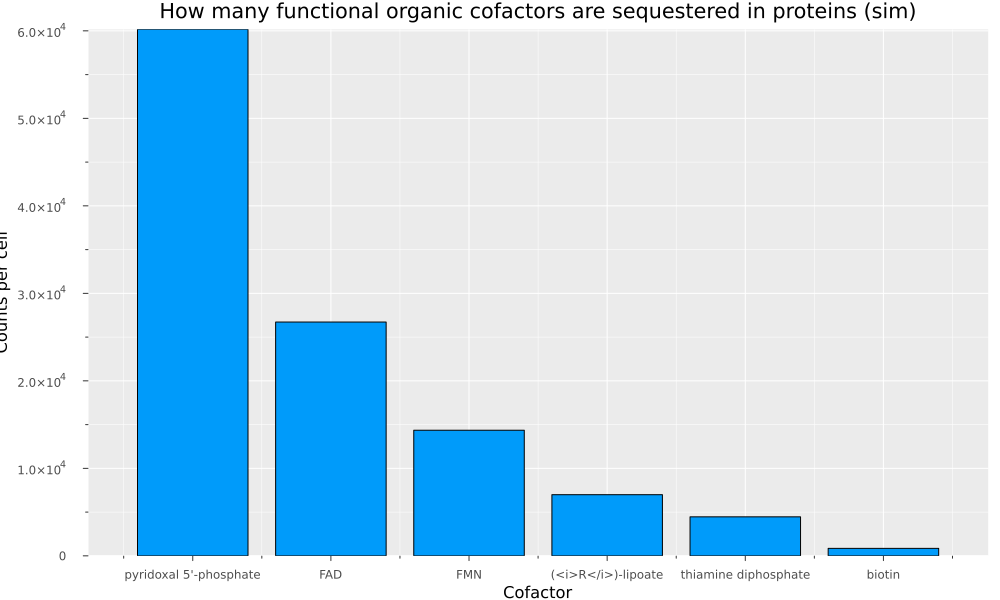

In [24]:
element_timeseries = total_counts * C * P

cur_elements = ["FAD", "FMN", "thiamine diphosphate", "pyridoxal 5'-phosphate", "biotin", "(<i>R</i>)-lipoate"]

element_idx = [element in cur_elements for element in cofactor_names]

sorted_idxs = sortperm(element_timeseries[1,element_idx], rev=true)

plot(bar(cofactor_names[element_idx][sorted_idxs], element_timeseries[1,element_idx][sorted_idxs]), legend = false, size=[1000,600],
    title="How many functional organic cofactors are sequestered in proteins (sim)", xlabel="Cofactor", ylabel="Counts per cell")

# savefig("figures/organic_counts.svg")

## Premium Amino Acids (tm)

In [25]:
aa_ids

22-element Vector{String}:
 "PRO"
 "ALA"
 "MET"
 "GLY"
 "GLN"
 "TRP"
 "SEL"
 "ASP"
 "LEU"
 "HIS"
 "TYR"
 "PHE"
 "THR"
 "ILE"
 "GLU"
 "SER"
 "ASN"
 "CYS"
 "LYS"
 "ARG"
 "TER"
 "VAL"

In [26]:
cur_elements = ["TRP"]
cap_entries = 50

# create counts matrices
C_P_counts = C .* repeat(counts, 1, length(monomer_names))
C_E_counts = C_P_counts * A #  * E


# we have to normalize the array because C is not norm-preserving. 
C_W = C * W * W2
C_W_norm = Array{Float64}(copy(C_W))

for i in 1:size(C_W_norm)[1]
    C_W_norm[i, :] = C_W[i, :] / (sum(C_W[i, :]) + 0.00001)
end

C_W_norm_counts_cats = C_W_norm

# creating element indices of interest
element_idxs = [element in cur_elements for element in aa_ids]
element_idxs_nz = findall(vec(element_idxs))

## cplx sorted by counts of elements
capped_complex_idx = sortperm(vec(sum(C_E_counts[:, element_idxs], dims=2)), rev=true)[1:cap_entries]
capped_classes = findall(vec(sum(C_W_norm_counts_cats[capped_complex_idx, :],dims=1) .!= 0))

capped_C_E = C_E_counts[capped_complex_idx, element_idxs]
capped_C_W = C_W_norm_counts_cats[capped_complex_idx, capped_classes]


# corrective factor multiplies a cplx by its cofactor stoichiometry
corrective_factor = sum((C * A)[capped_complex_idx, element_idxs], dims=2)

# create "remaining elements"
total_element_counts = vec(sum(C_E_counts[:, element_idxs], dims=1))
in_use_element_counts = vec(sum(capped_C_E, dims=1))
remaining_element_counts = vec(total_element_counts - in_use_element_counts)

# create "no class cplx", just use C_E counts
unclassified_cplx_idxs = vec(sum(capped_C_W, dims=2) .== 0)
unclassified_cplx_counts = vec(sum(capped_C_E, dims=2))

# create sizes
n_cplx = length(capped_complex_idx)
n_classes = length(capped_classes)
n_elements = length(cur_elements)

# initialize arrays
src = Vector{Int64}()
dst = Vector{Int64}()
weights = Vector{Int64}()

# create labels
node_labels = [aa_ids[element_idxs]; 
                unwrapped_protein_names[capped_complex_idx]; 
                unwrapped_pathway_names[capped_classes];
                ["Remaining $c proteins" for c ∈ aa_ids[element_idxs]];
                "Uncategorized"]

# create colors
colors = zeros(Int64, length(node_labels))

element_colors = collect(1:(n_elements))
other_color = 0

colors[1:n_elements] = element_colors

# create sorting
## sorts elements
ordering_elements = Vector{Pair{Int64, Int64}}()
sort_elements = sortperm(vec(sum(capped_C_E, dims=1)), rev=true)
for i in 1:(n_elements-1)
    push!(ordering_elements, sort_elements[i]=>sort_elements[i+1])
end

# sort_cplxs = sortperm(vec(sum(capped_C_E, dims=2)), rev=true)
# for i in 1:(n_cplx-1)
#     push!(ordering_elements, n_elements+sort_cplxs[i]=>n_elements+sort_cplxs[i+1]) 
# end

# order of index assignments
# elements, cplx, classes, remaining elements, no class label

# chart progress: E -> C -> W
# E -> C, reverse order because im a dumbass
for i in 1:n_elements
    for j in 1:n_cplx
        if capped_C_E[j, i] != 0
            
            push!(src, i)
            push!(dst, n_elements + j)
            push!(weights, capped_C_E[j, i])
            
            colors[n_elements + j] = colors[i]
            
        end  
    end
end

# # C -> W
for i in 1:n_cplx
    for j in 1:n_classes
        if capped_C_W[i, j] != 0
            
            # corrective factor multiplies by element multiplicity to maintain flow size
            
            push!(src, n_elements + i)
            push!(dst, n_elements + n_cplx + j)
            push!(weights, trunc(Int64, capped_C_W[i, j] * vec(sum(capped_C_E, dims=2))[i]))   
            
            colors[n_elements + n_cplx + j] = colors[n_elements + i]
            
        end  
    end
    
    if unclassified_cplx_idxs[i]
        push!(src, n_elements + i)
        push!(dst, n_elements + n_cplx + n_classes + n_elements + 1)
        push!(weights, unclassified_cplx_counts[i])
        
        colors[n_elements + n_cplx + n_classes + n_elements + 1] = colors[n_elements + i]
    end
    
end

# E -> C remaining cnts
for i in 1:n_elements
    push!(src, i)
    push!(dst, n_elements + n_cplx + n_classes + i)
    push!(weights, remaining_element_counts[i])
    colors[n_elements + n_cplx + n_classes + i] = colors[i]
end 

# # C -> P remaining cnts in displayed classes
# for i in 1:n_elements



In [27]:
sankey(src, dst, weights, 
        compact = true,
        node_labels = node_labels,
        node_colors = cgrad(:copper, maximum(colors)+1, categorical = true, rev=true)[colors],
        edge_color = :src,
        size=(1800, 1000),
        label_position = :right,
        label_size = 12,
        force_order = ordering_elements,
        title="How does the cell distribute it's precious TRP across proteins where TRP is part of a cofactor?"
)

savefig("figures/general_ressource_aa.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/general_ressource_aa.svg"

# Proteome mass fraction cofactor pathways

In [28]:
W_comb = W * W2
W_norm = Array{Float64}(copy(W_comb))

for i in 1:size(W_norm)[1]
    W_norm[i, :] = W_norm[i, :] / (sum(W_norm[i, :]) + 0.00001)
end

In [29]:
top_protein_masses = transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts)
top_protein_masses = Array{Float64}(top_protein_masses)
top_protein_masses = top_protein_masses ./ (10^(10)) 
top_protein_masses = top_protein_masses ./ (6.023 * 10^(13)) 

top_L2_rank = sortperm(top_protein_masses, rev=true)
total_protein_mass = sum(top_protein_masses)

[monomer_names[top_L2_rank] top_protein_masses[top_L2_rank]][1:40, :]

40×2 Matrix{Any}:
 "glyceraldehyde-3-phosphate\ndehydrogenase A"                     …  4.41847e-15
 "outer membrane porin F"                                             4.17609e-15
 "outer membrane protein A"                                           4.07232e-15
 "translation elongation factor\nTu 1"                                3.64902e-15
 "murein lipoprotein"                                                 2.80483e-15
 "HOMOCYSMET-MONOMER"                                              …  2.47375e-15
 "30S ribosomal subunit protein\nS1"                                  2.22396e-15
 "DLP12 prophage; omptin family\nouter membrane protease OmpT"        2.16401e-15
 "50S ribosomal subunit protein\nL12"                                 2.06493e-15
 "isocitrate dehydrogenase"                                           1.9369e-15
 "ketol-acid reductoisomerase\n(NADP<sup>+</sup>)"                 …  1.87438e-15
 "elongation factor G"                                                1.87422e-15

In [30]:
top_L2_classes_protein_masses = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts))
top_L2_classes_protein_masses = Array{Float64}(top_L2_classes_protein_masses)
top_L2_classes_protein_masses = top_L2_classes_protein_masses ./ (10^(10)) 
top_L2_classes_protein_masses = top_L2_classes_protein_masses ./ (6.023 * 10^(13)) 

top_L2_rank = sortperm(top_L2_classes_protein_masses, rev=true)

mass_relative = top_L2_classes_protein_masses ./ sum(top_L2_classes_protein_masses)
[pathway_names[top_L2_rank] mass_relative[top_L2_rank]][1:20, :]

20×2 Matrix{Any}:
 "Translation"                                   0.325227
 "Amino Acid Biosynthesis"                       0.0898771
 "Porin"                                         0.0616866
 "Glycolysis"                                    0.0586761
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"  0.052492
 "Regulation of transcription"                   0.0420666
 "Carbohydrate Biosynthesis"                     0.0319851
 "TCA cycle"                                     0.0303807
 "Nucleoside and Nucleotide\nBiosynthesis"       0.0298913
 "Transcription"                                 0.0272386
 "Aminoacyl-tRNA Charging"                       0.0259715
 "Proteolysis"                                   0.0237183
 "Fatty Acid and Lipid\nBiosynthesis"            0.0220135
 "Protein folding"                               0.0217722
 "Redox homeostasis"                             0.0177147
 "Electron Transfer Chains"                      0.0138688
 "Reactive Oxygen Species\nDegradation" 

In [31]:
plot(bar(pathway_names[top_L2_rank][1:10], mass_relative[top_L2_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Protein mass fraction allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of proteome",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)


savefig("figures/protein_mass_dist_class.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/protein_mass_dist_class.svg"

# Compare with Fe

In [32]:
cur_elements = ["FE"]

element_idxs = [element in cur_elements for element in element_names]

C_E = C * P * E
c_e = vec(C_E[:, element_idxs])
nz_e_idxs = findall(c_e .> 0)

[c_e[nz_e_idxs] protein_names[nz_e_idxs]]

c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))
e_w_relative = e_w ./ sum(e_w)

top_e_w_rank = sortperm(e_w, rev=true)

[pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]

40×2 Matrix{Any}:
 "Electron Transfer Chains"                                         34764.0
 "Reactive Oxygen Species\nDegradation"                             30689.0
 "Cofactor, Carrier, and Vitamin\nBiosynthesis"                     30258.4
 "Amino Acid Biosynthesis"                                          29667.3
 "Iron-sulfur cluster assembly"                                     28415.0
 "Regulation of transcription"                                      17658.0
 "TCA cycle"                                                        14208.3
 "Redox homeostasis"                                                 6489.0
 "Secondary Metabolite\nBiosynthesis"                                4856.0
 "Nucleoside and Nucleotide\nBiosynthesis"                           4536.0
 "Fermentation"                                                      3028.0
 "DNA repair"                                                        1112.0
 "Translation"                                                        

In [33]:
plot(bar(pathway_names[top_e_w_rank][1:10], e_w_relative[top_e_w_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Iron mass allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of cell iron",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/iron_mass_dist_class.svg")

"/Users/cyrus/vivarium-ecoli/notebooks/cofactors/figures/iron_mass_dist_class.svg"

In [ ]:
cur_elements = ["ZN"]

element_idxs = [element in cur_elements for element in element_names]

C_E = C * P * E
c_e = vec(C_E[:, element_idxs])
nz_e_idxs = findall(c_e .> 0)


c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))
e_w_relative = e_w ./ sum(e_w)

top_e_w_rank = sortperm(e_w, rev=true)

[pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]

In [ ]:
plot(bar(pathway_names[top_e_w_rank][1:10], e_w_relative[top_e_w_rank][1:10]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Zinc mass allocation to major cell pathways and functions", 
    xlabel="Pathway/function", ylabel="Fraction of cell zinc",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/zinc_mass_dist_class.svg")

In [ ]:
minor_elements = ["CU", "MN"]
plot_array = []

for element in minor_elements
    cur_elements = [element]
    
    element_idxs = [element in cur_elements for element in element_names]
    
    C_E = C * P * E
    c_e = vec(C_E[:, element_idxs])
    nz_e_idxs = findall(c_e .> 0)
    
    
    c_e_counts = counts[nz_e_idxs] .* c_e[nz_e_idxs] 
    
    # other counts already took care of complex size, magnitude, etc. 
    C_W = C * W * W2
    C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)
    
    E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts
    
    e_w = vec(sum(E_W_capped, dims=1))
    e_w_relative = e_w ./ sum(e_w)
    
    top_e_w_rank = sortperm(e_w, rev=true)
    
    [pathway_names[top_e_w_rank] e_w[top_e_w_rank]][1:40, :]
    
    
    p = plot(bar(pathway_names[top_e_w_rank][1:4], e_w_relative[top_e_w_rank][1:4]), 
        legend = false, size=[800,400],
        rotation=45, 
        title="$element allocation in cell", 
        xlabel="Pathway/function", ylabel="Fraction of cell $element",
        bottom_margin=30Plots.mm, left_margin=5Plots.mm)

    push!(plot_array, p)

end

plot(plot_array..., layout=(1, 2))

savefig("figures/cu_mn_dist_class.svg")

# metal ion per mass ratio

In [ ]:
cur_elements = ["FE", "ZN", "MN", "CA", "NI", "CU", "MO", "SE", "CO"]

element_idxs = [element in cur_elements for element in element_names]

# first, get mass per top 20 class
# normalized class belonging
W_comb = W * W2
W_norm = Array{Float64}(copy(W_comb))

for i in 1:size(W_norm)[1]
    W_norm[i, :] = W_norm[i, :] / (sum(W_norm[i, :]) + 0.00001)
end

# first, for cplxes without cofactor 
mass_per_class = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts))
mass_per_class = Array{Float64}(mass_per_class)
mass_per_class = mass_per_class ./ (10^(10)) 
mass_per_class = mass_per_class ./ (6.023 * 10^(13)) 

top_mass_class = sortperm(mass_per_class, rev=true)
top_mass_filter = top_mass_class[1:15]

# now, get counts of transition metal ions per class
c_e_summed = vec(sum((C * P * E)[:, element_idxs], dims=2))
nz_e_idxs = findall(c_e_summed .> 0)

c_e_counts = counts[nz_e_idxs] .* c_e_summed[nz_e_idxs] 

# other counts already took care of complex size, magnitude, etc. 
C_W = C * W * W2
C_W_normed = C_W ./ (sum(C_W, dims=2) .+ 0.0000001)

E_W_capped = C_W_normed[nz_e_idxs, :] .* c_e_counts

e_w = vec(sum(E_W_capped, dims=1))

top_e_w_rank = sortperm(e_w, rev=true)

metal_atoms_per_protein_mass = e_w ./ (mass_per_class .* 10^15)
remove_nan = findall(isnan.(metal_atoms_per_protein_mass)) 
top_ratios = sortperm(metal_atoms_per_protein_mass, rev=true) 

filtered_top_ratios = [item for item in top_ratios if item ∉ remove_nan]
filtered_top_ratios = [item for item in filtered_top_ratios if item ∈ top_mass_filter]

[pathway_names[filtered_top_ratios] metal_atoms_per_protein_mass[filtered_top_ratios]][1:10, :]

In [ ]:
plot(bar(pathway_names[filtered_top_ratios][1:15], metal_atoms_per_protein_mass[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Transition metal atoms per fg of protein, per sector", 
    xlabel="Pathway/function", ylabel="Transition metal atoms / fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/atoms_per_fg_per_sector.svg")

In [ ]:
plot(bar(pathway_names[filtered_top_ratios][1:15], (mass_per_class .* 10^15)[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="fg of protein per sector", 
    xlabel="Pathway/function", ylabel="fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/protein_per_sector.svg")

In [ ]:
plot(bar(pathway_names[filtered_top_ratios][1:15], e_w[filtered_top_ratios][1:15]), 
    legend = false, size=[1000,500],
    rotation=45, 
    title="Transition metal atoms per sector", 
    xlabel="Pathway/function", ylabel="fg protein",
    bottom_margin=25Plots.mm, left_margin=5Plots.mm)

savefig("figures/atoms_per_sector.svg")

# Fraction of active protein complexes with at least one cofactor 

In [ ]:
cur_elements = ["FE", "ZN", "MN", "CA", "NI", "CU", "MO", "SE", "CO"]

element_idxs = [element in cur_elements for element in element_names]

# first, get indices of cplxes with trace elements
C_bin = C .> 0
P_bin = P .> 0
E_bin = E .> 0

CE_bin = C_bin * P_bin * E_bin

bin_cplx = vec(sum(CE_bin[1:length(complex_names), element_idxs], dims=2) .> 0)

# then, get fraction of mass per cplx
all_masses = transpose(Diagonal(monomer_masses)) * transpose(C) * vec(counts)
all_masses = Array{Float64}(all_masses)
all_masses = all_masses ./ (10^(10)) 
all_masses = all_masses ./ (6.023 * 10^(13)) 

# filter to cplx
sum(all_masses[1:length(complex_names)])
sum(all_masses[1:length(complex_names)][bin_cplx]) / sum(all_masses[1:length(complex_names)])

## distributed across classes

In [ ]:
# normalized class belonging
W_comb = W * W2
W_norm = Array{Float64}(copy(W_comb))

for i in 1:size(W_norm)[1]
    W_norm[i, :] = W_norm[i, :] / (sum(W_norm[i, :]) + 0.00001)
end

# first, for cplxes without cofactor 
C_cut = C[1:length(complex_names), :]
counts_cut = counts[1:length(complex_names)]
counts_cut_pos = counts_cut .* bin_cplx

mass_per_class = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C_cut) * vec(counts_cut))
mass_per_class = Array{Float64}(mass_per_class)
mass_per_class = mass_per_class ./ (10^(10)) 
mass_per_class = mass_per_class ./ (6.023 * 10^(13)) 

pos_mass_per_class = (transpose(W_norm) * transpose(Diagonal(monomer_masses)) * transpose(C_cut) * vec(counts_cut_pos))
pos_mass_per_class = Array{Float64}(pos_mass_per_class)
pos_mass_per_class = pos_mass_per_class ./ (10^(10)) 
pos_mass_per_class = pos_mass_per_class ./ (6.023 * 10^(13)) 

top_mass_class = sortperm(mass_per_class, rev=true)

pos_ratio = pos_mass_per_class ./ mass_per_class

mass_relative = mass_per_class ./ sum(mass_per_class)
[pathway_names[top_mass_class] mass_per_class[top_mass_class] pos_mass_per_class[top_mass_class] pos_ratio[top_mass_class]][1:15, :]

In [ ]:
length(complex_names)

## misc

In [ ]:
findfirst(isequal("REACTIVE-OXYGEN-SPECIES-DEGRADATION"), pathway_names)

In [ ]:
findfirst(isequal("DETOX1-PWY"), pathway_names)

In [ ]:
findfirst(isequal("CARBPSYN-CPLX"), protein_names)